# ACS2 in Heist environment

In [ ]:
%matplotlib inline

from __future__ import unicode_literals
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from pylab import cm
import pathlib
import numpy as np
import pandas as pd

import logging
logging.basicConfig(level=logging.WARN)

from lcs import Perception
from lcs.agents import EnvironmentAdapter
from lcs.agents.acs2 import ACS2, Configuration, ClassifiersList
from lcs.metrics import population_metrics

import gym

In [ ]:
from utils.cache import get_from_cache_or_run

%run './utils/experiments.py'
%run './utils/metrics.py'
%run './utils/plots.py'

In [ ]:
cache_prefix = f'{pathlib.Path().absolute()}/cache/'

## Heist Environment

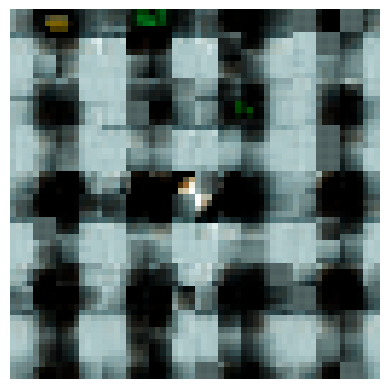

In [7]:
env_maxpool = gym.make('heist_autoencoder:heist-auto-maxpool-v0')
situation = env_maxpool.reset()
env_maxpool.render()

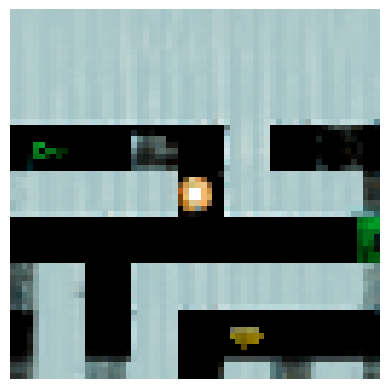

In [4]:
env_maxpoolbig = gym.make('heist_autoencoder:heist-auto-maxpool-big-v0')
env_maxpoolbig.reset()
env_maxpoolbig.render()

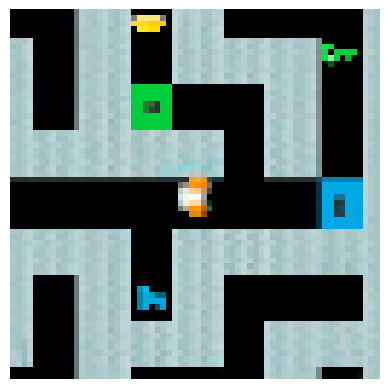

In [5]:
env_vaealex = gym.make('heist_autoencoder:heist-vae-alex-v0')
env_vaealex.reset()
env_vaealex.render()

In [ ]:
state, reward, done, _ = env_maxpool.step(env_maxpool.action_space.sample())

## Environment setup

In [4]:
 _range, _low = (env_maxpool.observation_space.high - env_maxpool.observation_space.low, env_maxpool.observation_space.low)

class DiscretizedWrapper(gym.ObservationWrapper):
    def discretize(self, obs, _type=int):
        r = (obs + np.abs(_low)) / _range
        b = (r * 10).astype(int)
        return b.astype(_type).tolist()

    def observation(self, obs):
        return self.discretize(obs, _type=int)

In [ ]:
env_maxpool = DiscretizedWrapper(env_maxpool)
env_maxpoolbig = DiscretizedWrapper(env_maxpoolbig)
env_vaealex = DiscretizedWrapper(env_vaealex)

## Basic Metrics

In [ ]:
learning_rate = 0.2
discount_factor = 0.95
epsilon = 0.2
zeta = 0.0001

basic_cfg = {
    'perception_bits': 16,
    'possible_actions': 9,
    'do_ga': False,
    'beta': learning_rate,
    'epsilon': epsilon,
    'gamma': discount_factor,
    'zeta': zeta,
    'user_metrics_collector_fcn': common_metrics,
    'biased_exploration_prob': 0,
    'metrics_trial_freq': 1
}

trials = 4000
experiments = 5

In [73]:
result = get_from_cache_or_run(
    r'..\cache\4000trials-maxpool-maxpoolbig-vaealex-5exp.dill',
    avg_experiments(experiments, envs={"MaxPool": env_maxpool, "MaxPoolBig": env_maxpoolbig, "VAEAlex": env_vaealex}, trials=trials, params=basic_cfg,fun=run_experiments_alternating)
)

### MaxPool

In [59]:
result["MaxPool"]["agg_df"]

                  phase  steps_in_trial        rho  population  reliable
agent    trial                                                          
AACS2_v1 0      explore           988.0   0.000000        94.0      48.0
         1      exploit           894.0  26.428437        88.0      36.0
         2      explore           990.0   0.000000        25.0       0.0
         3      exploit           757.0  23.876197        22.0      16.0
         4      explore           966.0   5.663540         0.0       0.0
...                 ...             ...        ...         ...       ...
ACS2     3995   exploit           600.0   0.000000     11276.0    4347.0
         3996   explore           556.0   0.000000     11833.0    4041.0
         3997   exploit           556.0   0.000000     11496.0    4449.0
         3998   explore           575.0   0.000000     10179.0    3965.0
         3999   exploit           564.0   0.000000     12207.0    4171.0

[12000 rows x 5 columns]


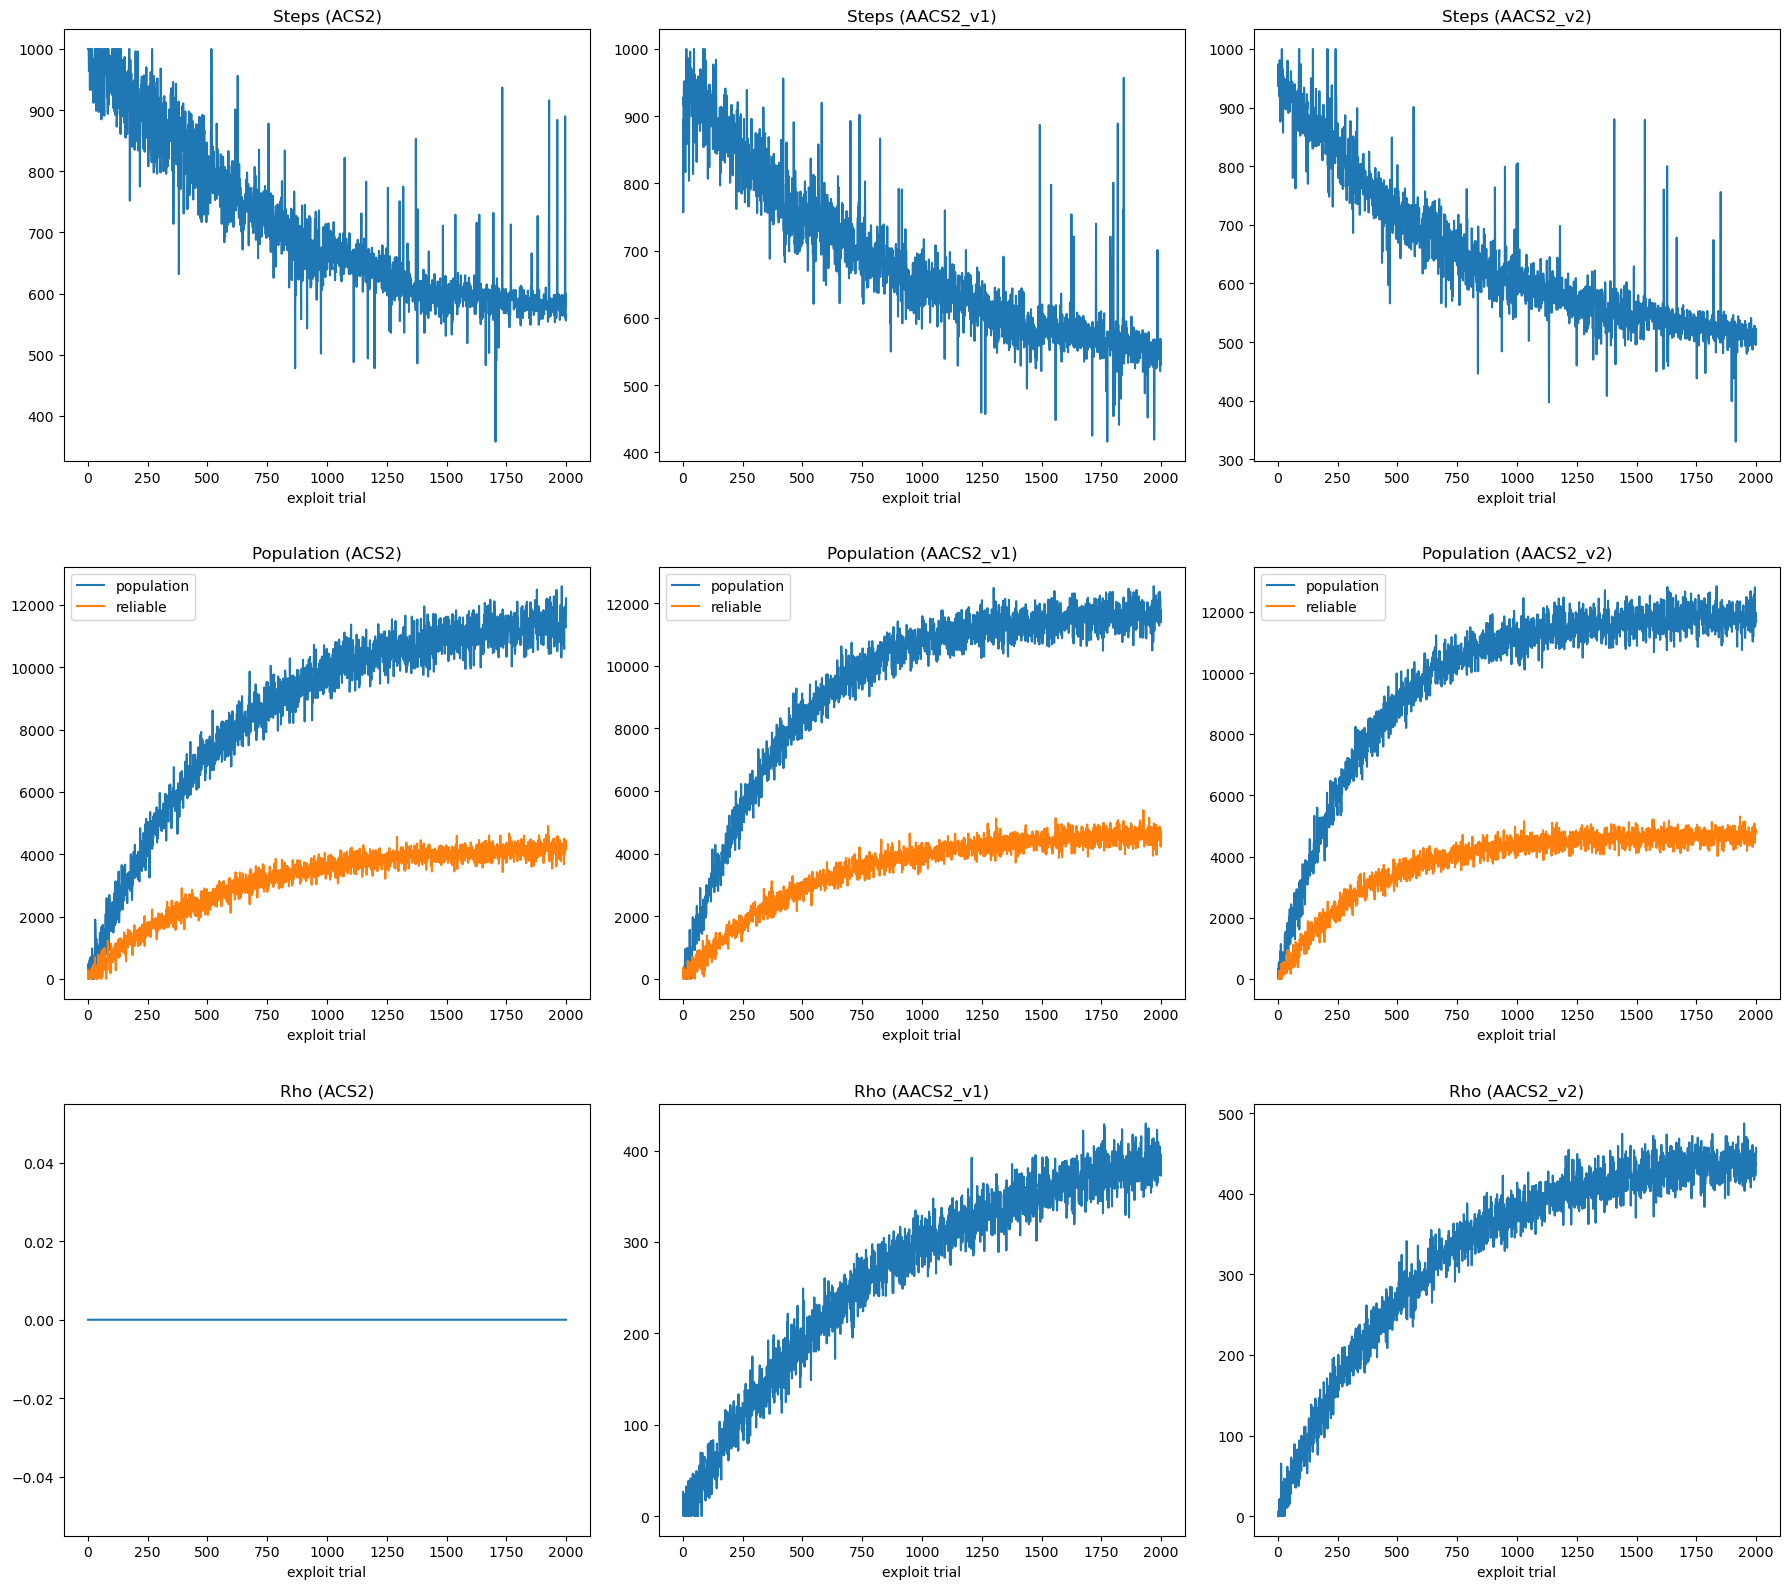

In [60]:
plot_exploit_results(result["MaxPool"]["agg_df"])

### MaxPoolBig

In [61]:
result["MaxPoolBig"]["agg_df"]

                  phase  steps_in_trial        rho  population  reliable
agent    trial                                                          
AACS2_v1 0      explore           925.0   0.000000        42.0      20.0
         1      exploit           927.0   1.784303       248.0     154.0
         2      explore           970.0  32.914788       624.0       0.0
         3      exploit           996.0   0.000000       488.0     375.0
         4      explore           889.0  18.557298         0.0       0.0
...                 ...             ...        ...         ...       ...
ACS2     3995   exploit           519.0   0.000000     10665.0    5647.0
         3996   explore           516.0   0.000000     10520.0    5465.0
         3997   exploit           487.0   0.000000     10912.0    5432.0
         3998   explore           443.0   0.000000     10859.0    5782.0
         3999   exploit           531.0   0.000000     11045.0    5571.0

[12000 rows x 5 columns]


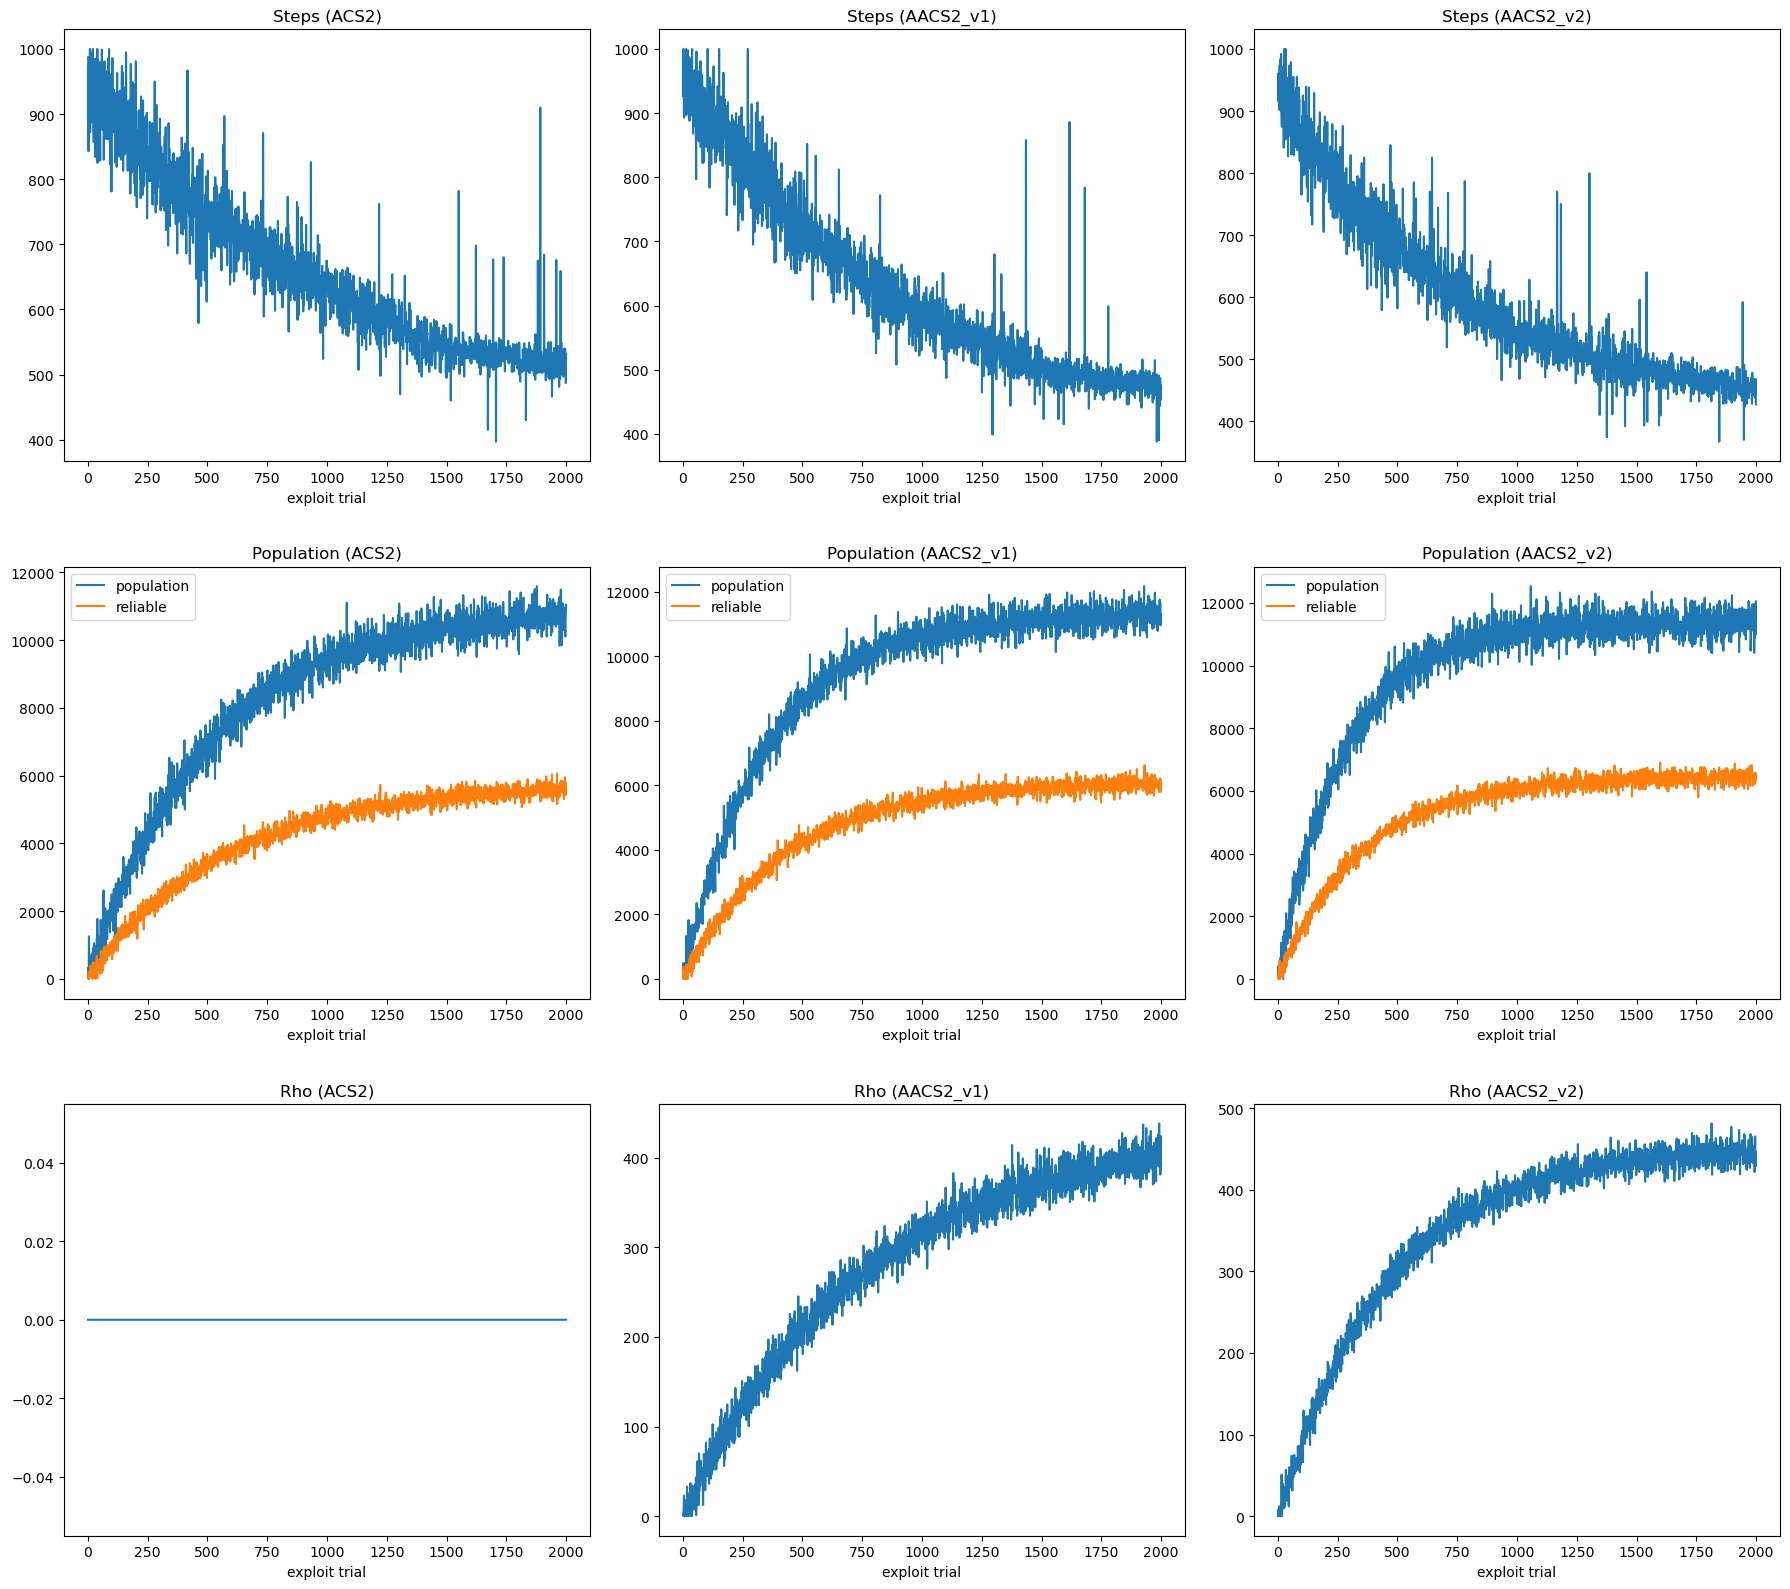

In [62]:
plot_exploit_results(result["MaxPoolBig"]["agg_df"])

### VAEAlex

In [26]:
result["VAEAlex"]["agg_df"]

                  phase  steps_in_trial       rho  population  reliable
agent    trial                                                         
AACS2_v1 0      explore           894.0  1.724548        20.0       0.0
         1      exploit           817.0  2.134902        83.0     160.0
         2      explore           908.0  0.000000       150.0      21.0
         3      exploit           807.0  1.009004        79.0      26.0
         4      explore           853.0  0.000000        59.0      18.0
...                 ...             ...       ...         ...       ...
ACS2     3995   exploit           398.0  0.000000     12182.0    6699.0
         3996   explore           382.0  0.000000     12567.0    6808.0
         3997   exploit           384.0  0.000000     12268.0    6803.0
         3998   explore           388.0  0.000000     11541.0    6675.0
         3999   exploit           389.0  0.000000     12482.0    6826.0

[12000 rows x 5 columns]


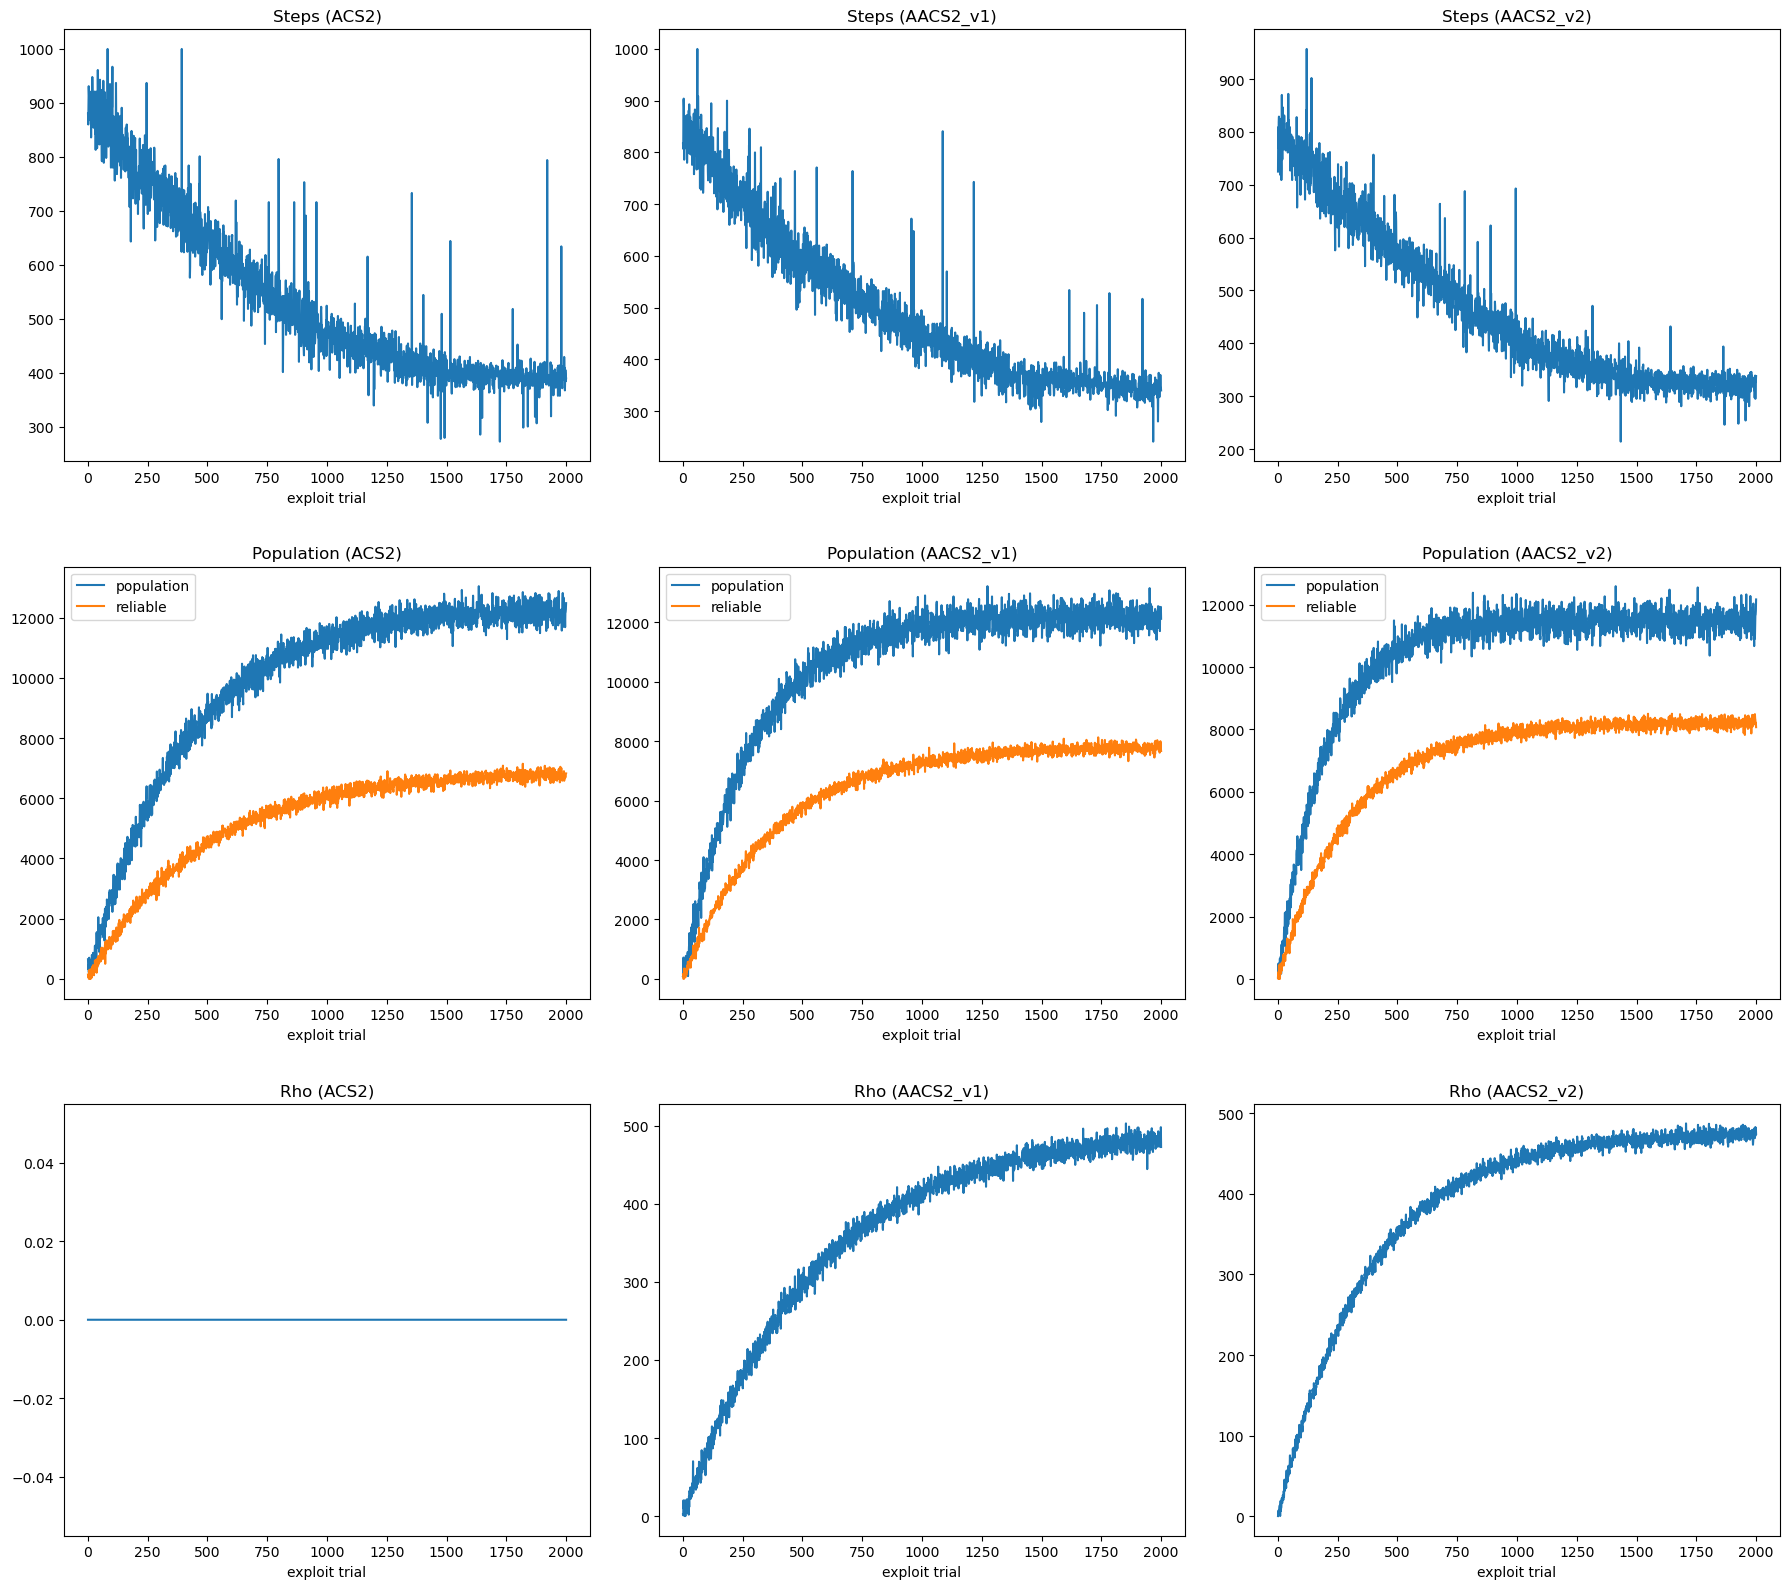

In [29]:
plot_exploit_results(result["VAEAlex"]["agg_df"])